# Data scientist: analytics specialist path Codecademy

# 14. Data Science Foundations Project: Biodiversity in National Parks

# Objectives

Interpret data from the American national parks service (system) about endangered (plant and animal) species found in (four) different National park sites.

# Introduction

A fundamental responsibility of the American National Park Service is to understand and protect the diversity of life within the park.National Park species lists provide information on the presence and status of species in the national parks.Each park species record includes a species, park name, taxonomic information (species categorization), scientific name, one common name, record status, occurrence (verification of species presence in park), nativeness, abundance (presence and visibility of species in park), and conservation status (species classification according to US Fish & Wildlife Service) (REF1).

# Methods

Data about different species, their conservation status and observations related to the number of times each species was observed at four national park sites for the past 7 days have been available through two CSV files (observations.csv, and species.csv) from the Codecademy platform.    
The Exploratory Data Analysis (EDA) approach was used to perform first the initial data inspection, cleaning, and validation process, then to perform data analysis on the conservation statuses of these species and further to get an insight whether there could be any patterns to the types of species to become endangered. Data analysis was performed using Python 3 software. The Python script is reported in Append. 

# Results 

A first inspection of the two csv files did show the presence of seven categories related to different class of animals (Amphibian, Bird, Fish, Mammal, Nonvascular Plant, Reptile, Vascular Plant) and four types  of their conservation status (
 Endangered, Species in Recovery, Species of Concern and Threatened species) in four different national park sites (Great Smoky Mountains National Park, Yosemite National Park, Yellowstone National Park, and Bryce National Park) were species were found.
A further diagnose of the data did underline the presence of  Not a Number (NaN) observations into the category species. Based on the assumption that this nan values could mean that for this category there was no need to manage these species,  a new category, No-intervantion, of the conservation status has been enclosed in the dataframe. 
With regard the distribution of conservation status for animals, this analysis has shown that Birds, Vascular Plant and Mammal, classified as Species of Concern, have the highest distribution compared with the other species and their related conservation status.
The analysis whether certain types of species are more likely to be endangered, has been determined by calculating the percentage of danger status in each species. Because the animal which is endangered is also protected, a new variable, is_protected, have been enclosed for this type of species. Further, it has been shown up that two types of species, Mammals and Birds, are more likely to be Endangered (respectively 17.8 and 15.2). On the other side, Non vascular Plant and Vascular Plant seem not to be endangered (respectively 1.5 and 1.0).
The results related to underline  differences between species and their conservation status significant have shown that category soecies and is_protected association is likely to be significant.
Vascular plant and birds seem to be the species that were spotted the most at each park site. However,  neverless the number of observations for each park site are equal, the distribution of their category species is different.

# Conclusions

To sum up this analysis has shown the importance of the knowledge of park biodiversity and that the species inventories varies from park to park, which may result in data gaps.
One limitation of this analysis could be the precence of 31 duplicates that have not been drop put before to perform the analysis.
Another  limitation could be the absence of information of the exact period related to the seven days in which the observations were performed. This does not allow to investigate possible seasonal different patterns.

# Append

This script is divied into three main sections: upload (read) the two CSV files; Inspect, Clean, and Validate the two Datasets using the EDA approach and finally explore and explain the data.

DATA ACQUISITION 

Before to upload the two files, the Python libraries used in the further analysis have been imported. 

In [1]:
#Upload the Python libraries
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt 

Load the two datasets (CSV files) from the Codecademy platform

In [2]:
#observations.csv > This csv file holds recorded hightings of different species at several national parks for the past 7 days.
with open('observations.csv') as data_file:
    data_file_dict = csv.DictReader(data_file)

#species_info.csv > This csv file does contains data about different species and their conservation status
with open('species_info.csv') as data_file2:
    data_file_dict2 = csv.DictReader(data_file2)      

INSPECT, CLEAN AND VALIDATE THE TWO DATASETS

Make dataframe and explore the enclosed variables, the size and shape for each of the two csv files

In [3]:
#observations.csv file
dataset = pd.read_csv('observations.csv')
dataset_obs = pd.DataFrame(dataset) #Make dataframe 
dataset_obs.columns.values   #View  of the columns (varialbes) of the dataset 

array(['scientific_name', 'park_name', 'observations'], dtype=object)

The output shows that the observations csv file does contain three variables:scientific_name (the scientific name of each species); park_name (the park where species were found); observations (the number of times each species was observed at the park).

In [4]:
# dataframe.size
size = dataset_obs.size # Returns size of dataframe which is equivalent to total number of elements.
print(size)
# dataframe.shape
shape =dataset_obs.shape  
print(shape)

69888
(23296, 3)


As it can been seen, the size of the dataframe observations.csv (69888) is equivalent to its turple of shape (rows x columns = 23296x3 )

In [5]:
# species.csv file
datasett = pd.read_csv('species_info.csv')
dataset_sp = pd.DataFrame(datasett)  #Make dataframe 
dataset_sp.columns.values  #View  of the columns (varialbes) of the dataset 

array(['category', 'scientific_name', 'common_names',
       'conservation_status'], dtype=object)

The output does show that the species.csv file does contain four variables: category (the species categorization); scientific_name (the scientific name of each species); common_name (the common name of each species); conservation_status (species classification according to US Fish & Wildlife Service).

In [6]:
# dataframe.size
size2 = dataset_sp.size
print(size2)
# dataframe.shape
shape2 =dataset_sp.shape
print(shape2)

23296
(5824, 4)


As it can been seen, the size of the dataframe species.csv(23296) is equivalent to rows x columns (5824x4 ). Therefore, we can conclude that the total number of elements in the first dataframe is higher than in the second dataframe (69888 vs. 23296)

Let's continue to inpect and compare separately the two datasets, getting an overview of first items of each datasets, a concise summary of the dataframes and some their basic basic statistical details. 

In [7]:
#observations.csv file
print(dataset_obs.head()) # first items of the dataset
dataset_obs.info()     #concise summary of the dataframe like the index dtype and columns, non-null values and memory usage 
dataset_obs.describe() # basic statistical details like percentile, mean, std etc. of a dataframe

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


The output shows that in the observations.csv file two variables are categorical (scientific_name and park_name) and the other one is numerical (observations). Let's get an insight of each of these variables.

In [8]:
#Get the  number of unique values for each variable

#scientific_name
#Due to the large size of the dataframe (23296), the unique values of scientific_name will not at the moment inspect. 

#park_name
print(" The number of the different national park sites is {}".format(dataset_obs["park_name"].nunique())) 

 The number of the different national park sites is 4


In [9]:
#Find out the unique values of an array and return unique values based on a hash table.
#Uniques are returned in order of appearance. This does NOT sort. Therefore, they have been sorted before the calculation of unique values.  
#Park_name variable
print(dataset_obs.sort_values(by=['park_name']).park_name.unique())

['Bryce National Park' 'Great Smoky Mountains National Park'
 'Yellowstone National Park' 'Yosemite National Park']


The output does show the name of each of the four park sites: Bryce National Park(BNP), Great Smoky Mountains National Park (GRSM), Yellowstone National Park (YELL) and Yosemite National Park(YOSE). 
Hint: The abbreviation used to identify each park site is according to the NPS website (REF1). 

In [10]:
dataset_obs.sort_values(by=['park_name']).groupby("park_name").size()

park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64

The output shows that the four parks have the same size, thus the same number of elements.

In [11]:
dataset_obs.sort_values(by=['park_name']).groupby("park_name").describe()

observations                               \
                                           count        mean        std   min   
park_name                                                                       
Bryce National Park                       5824.0   98.905391  20.762061   9.0   
Great Smoky Mountains National Park       5824.0   74.144918  20.315457  10.0   
Yellowstone National Park                 5824.0  247.864354  23.168872  57.0   
Yosemite National Park                    5824.0  148.236951  21.221617  31.0   

                                                                 
                                       25%    50%    75%    max  
park_name                                                        
Bryce National Park                   85.0   99.0  113.0  176.0  
Great Smoky Mountains National Park   60.0   74.0   88.0  147.0  
Yellowstone National Park            235.0  249.0  262.0  321.0  
Yosemite National Park               134.0  149.0  162.0  223.0

This last output shows the overview of the summary statistics of each park site. As it can been seen, neverless the four parks have the same size, their mean, std, max and min values of observations is different. This finding is also displayed in the follwoing plot.

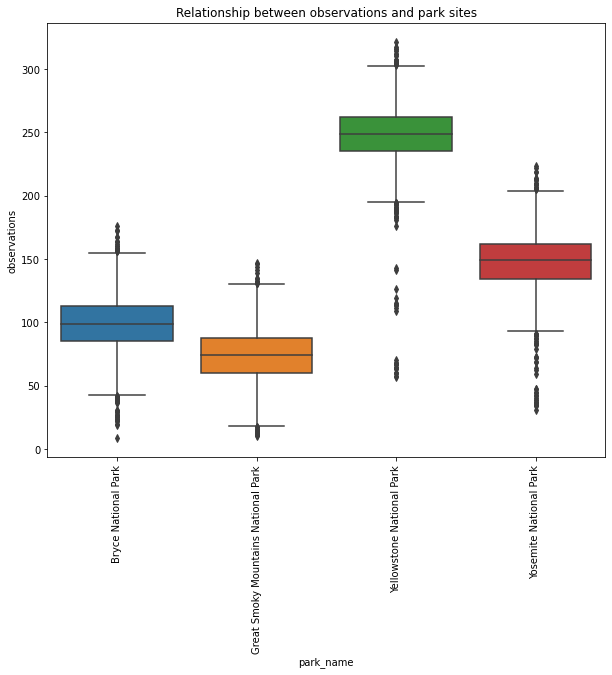

<Figure size 432x288 with 0 Axes>

In [12]:
#The facet grid of scatter graph mapping observations as a function of park sites
plt.figure(figsize=(10,8))
sns.boxplot(x="park_name", y="observations", data=dataset_obs.sort_values(by=['park_name']))
plt.title('Relationship between observations and park sites')
plt.xticks(rotation=90)
plt.savefig('Fig_obsvsparksites.png')
plt.show()
plt.clf()

In [13]:
#Overview of variations of observations per each species for each park. 
dataset_obs.sort_values(by=['park_name'])

,scientific_name,park_name,observations
4056,Ranunculus cymbalaria var. saximontanus,Bryce National Park,113
10085,Vaccinium membranaceum,Bryce National Park,94
22064,Cheilanthes tomentosa,Bryce National Park,73
4990,Epilobium ciliatum ssp. ciliatum,Bryce National Park,89
4989,Isotria medeoloides,Bryce National Park,42
...,...,...,...
12477,Bromus catharticus,Yosemite National Park,152
12480,Coreopsis auriculata,Yosemite National Park,140
12483,Trifolium obtusiflorum,Yosemite National Park,125
12414,Oxytropis parryi,Yosemite National Park,132


Due to the large size of the file, the above overview is limited to few items but it does give a view that for each park the number of observation is different by scientific name of the species. The absence of a species from a list does not necessarily mean the species is absent from a park. The time and effort spent on species inventories varies from park to park, which may result in data gaps (REF2).

In [14]:
#species.csv file
print(dataset_sp.head())
dataset_sp.info()

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      

The output shows that in the specis.csv file all the variables are categorical. Let's get an insight of each of these variables.

In [15]:
#category 
print(" The number of the different category of species is {}".format(dataset_sp["category"].nunique())) 

 The number of the different category of species is 7


In [16]:
print(dataset_sp.sort_values(by=['category']).category.unique())

['Amphibian' 'Bird' 'Fish' 'Mammal' 'Nonvascular Plant' 'Reptile'
 'Vascular Plant']


In [17]:
dataset_sp.sort_values(by=['category']).groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

The output shows that Vascular Plant does have the highest values of observations (4470), followed by Bird and NonVascular Plant (respectively, 521 and 333|). Amphibian does have the lowest value of observations. These resuts are also diplayed in the below plot.

C:\Users\Michela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


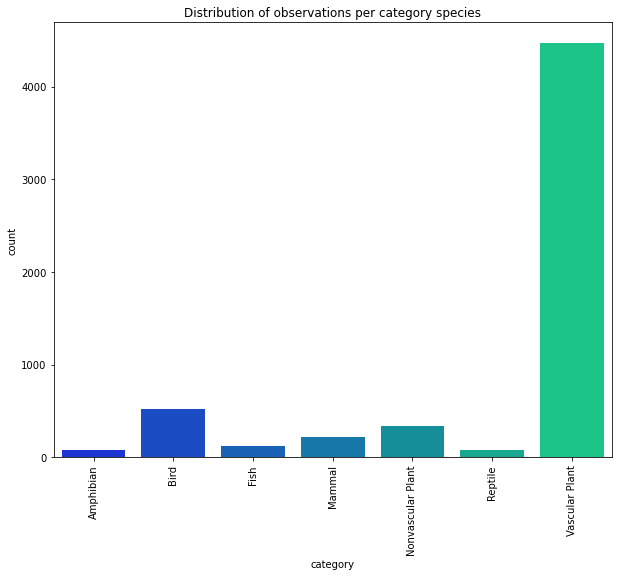

<Figure size 432x288 with 0 Axes>

In [18]:
#Barplot of the countcategorys(obs) in the category species variable 
plt.figure(figsize=(10,8))
name_species = ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile', 'Vascular Plant']
num_obs_species = [80, 521, 127, 214, 333, 79, 4470]

sns.countplot(dataset_sp['category'], order= name_species, palette='winter')
plt.xticks(rotation=90)
plt.title('Distribution of observations per category species')
plt.savefig('Obs_per species_bar_chart.png')

plt.show()
plt.clf()

In [19]:
#conservation_status 
print(" The number of the types of conservation status is {}".format(dataset_sp["conservation_status"].nunique())) 

 The number of the types of conservation status is 4


In [20]:
print(dataset_sp.sort_values(by=['conservation_status']).conservation_status.unique())

['Endangered' 'In Recovery' 'Species of Concern' 'Threatened' nan]


Hint! The species classification is according to US Fish & Wildlife Service (REF.1). Briefly: An Endangered (E) species is defined "in danger of extinction throughout all or a significant portion of its range". Species in Recovery (R) are species that has been removed from the list due to recovery. Species of Concern (SC) is a species that has not been classified as E, T, C status but have been identified as important to monitor. A Threatened (T) species is "likely to become endangered within the foreseeable future throughout all or a significant portion of its range".

Neverless the number of type of conservation status is four, the output shows that presence of an additional type, "nan". Based on the assumption that this nan means that  there is no need to manage these species, a new category in conservation_status, No-intervention, has been enclosed and further replaced with nan.

In [21]:
dataset_sp.conservation_status = dataset_sp.conservation_status.fillna('No intervention')

In [22]:
print(dataset_sp.sort_values(by=['conservation_status']).conservation_status.unique())

['Endangered' 'In Recovery' 'No intervention' 'Species of Concern'
 'Threatened']


In [23]:
dataset_sp.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

The output does show up that there is no need to manage the majority of the species, followed by species of concern (161) and few species enclosed as endangered (16), threatened (10) and in Recovery(4).

Let's consider the distribution of conservation status for animals (category of species) excluding the species that no need of intervention.

In [24]:
#drop out the no intervantion conservation status 
cons_st = dataset_sp[dataset_sp.conservation_status.isin(['Endangered', 'In Recovery', 'Species of Concern', 'Threatened'])]

In [25]:
# create a group using groupby
group = cons_st.groupby(['category', 'conservation_status'])
# size of group to count observations
group = group.size()
  
# make a column name 
group.reset_index(name='Observation')

,category,conservation_status,Observation
0,Amphibian,Endangered,1
1,Amphibian,Species of Concern,4
2,Amphibian,Threatened,2
3,Bird,Endangered,4
4,Bird,In Recovery,3
5,Bird,Species of Concern,72
6,Fish,Endangered,3
7,Fish,Species of Concern,4
8,Fish,Threatened,4
9,Mammal,Endangered,7


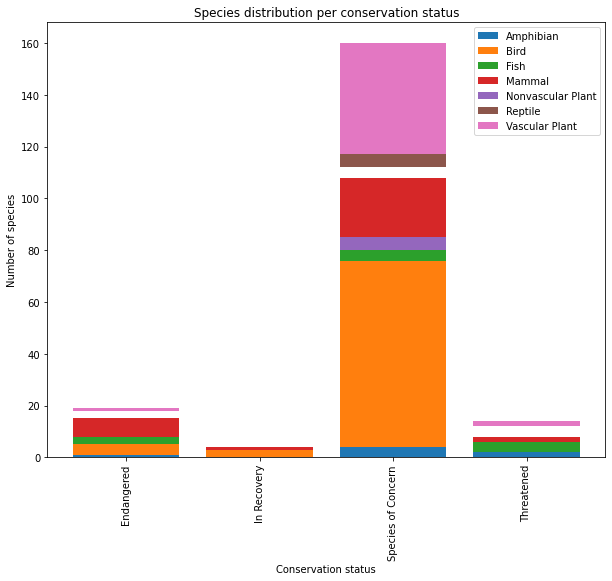

<Figure size 432x288 with 0 Axes>

In [26]:
# Plot species distribution per conservation status
#Plot category vs conversation_status 
conservation_status = ['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']
#category1 =Amphibian
As =  [1, 0, 4, 2]  
#category2 = Bird
Bs = [4, 3, 72, 0]    
#category3 = Fish
Cs = [3, 0, 4, 4]     
#category4 = Mammal
Ds = [ 7, 1, 28, 2]   
#category5 = Non vascular plant
Es = [ 0, 0, 5, 0]        
#category6 = Reptile
Fs = [0, 0, 5, 0]        
#category7 = Vascular plant
Gs = [1, 0, 43, 2]  

x = range(4)

c_bottom = np.add(As, Bs)
# create d_bottom, e_bottom, f_bottom and g_bottom here
d_bottom = np.add(c_bottom, Cs)
e_bottom = np.add(d_bottom, Cs)
f_bottom = np.add(e_bottom, Ds)
g_bottom = np.add(f_bottom, Fs)

# Make figure with the required dimension 
plt.figure(figsize=(10, 8))

#Plot each of the four graphs 
plt.bar(range(4), As)
plt.bar(range(4), Bs, bottom=As)
plt.bar(range(4), Cs, bottom = c_bottom)
plt.bar(range(4), Ds, bottom = d_bottom)
plt.bar(range(4), Es, bottom = d_bottom)
plt.bar(range(4), Fs, bottom = f_bottom)
plt.bar(range(4), Gs, bottom = g_bottom)

#Create the required set of axes
ax=plt.subplot()
ax.set_xticks(range(4))
ax.set_xticklabels(conservation_status, rotation=90)

#Add title, and label to x and y axis 
plt.title('Species distribution per conservation status')
plt.xlabel('Conservation status')
plt.ylabel('Number of species')
#Enclose legend to the plot 
legend_labels = ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile', 'Vascular Plant']
plt.legend(legend_labels, loc=1)

#Save plot in png format 
plt.savefig('conversion_status_stacked_bar.png')
plt.show()
plt.clf()

From the plot, it can been seen that Birds, Vascular Plant and Mammal, classified as Species of Concern, have the highest distribution compared both with the other species and related conservation status.

Let's see whether certain types of species are  more likely to be endangered. This issue can be determined by calculating the percentage of danger status in each species.

Because the animal which is endangered is also protected, a new variable, is_protected, have been enclosed for this type of species.

In [27]:
dataset_sp['is_protected'] = dataset_sp.conservation_status != 'No intervention'  #!= is different than 

In [28]:
category_protected_feq = pd.crosstab(dataset_sp.category, dataset_sp.is_protected)
category_protected_feq

is_protected,False,True
category,,
Amphibian,73,7
Bird,442,79
Fish,116,11
Mammal,176,38
Nonvascular Plant,328,5
Reptile,74,5
Vascular Plant,4424,46


In [29]:
category_protected_prop =category_protected_feq[True]/category_protected_feq.sum(axis=1)*100
category_protected_prop

category
Amphibian             8.750000
Bird                 15.163148
Fish                  8.661417
Mammal               17.757009
Nonvascular Plant     1.501502
Reptile               6.329114
Vascular Plant        1.029083
dtype: float64

The output shows that Mammals and Birds are more likely to be Endangered (respectively 17.8 and 15.2). On the other side, Non vascular Plant and Vascular Plant seem not to be endangered (respectively 1.5 and 1.0). The below plot does show the distribution of types of species more likely to be endangered.

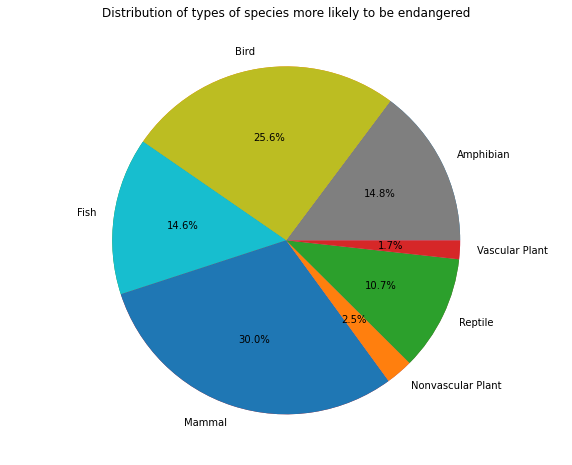

<Figure size 432x288 with 0 Axes>

In [30]:
#Pie chart of the distribution of types of species more likely to be endangered.
plt.figure(figsize=(10,8))
species_category_names = ["Amphibian", "Bird", "Fish", "Mammal", "Nonvascular Plant", "Reptile", "Vascular Plant"]
species_category_freqs = [8.75, 15.16, 8.66, 17.76, 1.50, 6.34, 1.03]

plt.pie(species_category_freqs)
plt.axis('equal')

#Enclose the percentange to each slice 
plt.pie(species_category_freqs, labels=species_category_names, autopct = '%0.1f%%')
plt.title('Distribution of types of species more likely to be endangered') 
plt.savefig('Fig4.png')
plt.show()
plt.clf()

To get an insight whether the differences between species and their conservation status could be significant, the Chi-Square test has been used. 

In [31]:
#Chi-Square test
from scipy.stats import chi2_contingency
protected_category_feq = pd.crosstab(dataset_sp.is_protected,dataset_sp.category)
chi2, pval, dof, expected = chi2_contingency(protected_category_feq)
print(pval)

3.095911909904608e-98


From the output, we can conlude that species category and is_protected association is likely to be significant.

Let's see which species were spotted the most at each park. 

Let's see which species were spotted the most at each park. To achieve this, the two dataframse have been merged based on their common variable, scientific_name. 

In [32]:
#Merge the observations.csv and species.csv files beased on their common variable, scientific_name. 
merged_df2 = pd.merge(dataset_obs, dataset_sp, on ='scientific_name')

Let's inpect and compare the new dataset, getting an overview of first items of each datasets, a concise summary of the dataframes and some their basic basic statistical details.

In [33]:
print(merged_df2.head())
merged_df2.columns.values  
merged_df2.info()
merged_df2.describe()

      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  \
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch     No intervention   
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch     No intervention   
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch     No intervention   
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch     No intervention   
4          Mammal                       American Mink     No intervention   

   is_protected  
0         False  
1         False  
2         False  
3       

,observations
count,25632.000000
mean,142.214693
std,69.912475
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [34]:
# dataframe.size
size3 = merged_df2.size
print(size3)
# dataframe.shape
shape3 =merged_df2.shape
print(shape3)

179424
(25632, 7)


In [35]:
# create a group using groupby
group2 = merged_df2.groupby(['category', 'park_name'])
  
# size of group to count observations
group2 = group2.size()
  
# make a column name 
group2.reset_index(name='Obs')

,category,park_name,Obs
0,Amphibian,Bryce National Park,82
1,Amphibian,Great Smoky Mountains National Park,82
2,Amphibian,Yellowstone National Park,82
3,Amphibian,Yosemite National Park,82
4,Bird,Bryce National Park,591
5,Bird,Great Smoky Mountains National Park,591
6,Bird,Yellowstone National Park,591
7,Bird,Yosemite National Park,591
8,Fish,Bryce National Park,131
9,Fish,Great Smoky Mountains National Park,131


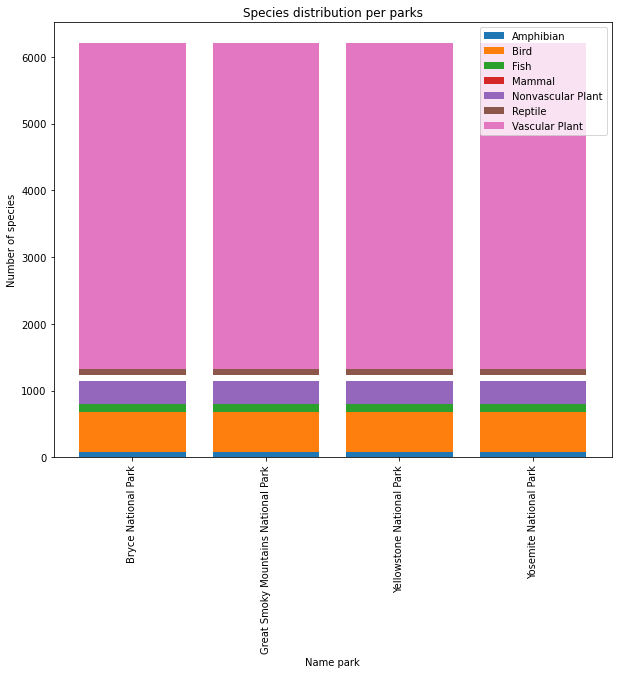

<Figure size 432x288 with 0 Axes>

In [36]:
#Plot species category distribution per parks sites'

name_park = ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']

As =  [82, 82, 82, 82]   #category1=Amphibian
Bs = [591, 591, 591, 591]    #category2 = Bird
Cs = [131, 131, 131, 131]     #category3 = Fish
Ds = [ 300, 300, 300, 300]  #category4 = Mammal
Es = [ 333, 333, 333, 333]    #category5 = Non vascular plant   
Fs = [81, 81, 81, 81]      #category6 = Reptile  
Gs = [4890, 4890, 4890, 4890]     #category7 = Vascular plant

x = range(4)

c_bottom = np.add(As, Bs)
# create d_bottom, e_bottom, f_bottom and g_bottom here
d_bottom = np.add(c_bottom, Cs) # create d_bottom 
e_bottom = np.add(d_bottom, Cs) # create e_bottom 
f_bottom = np.add(e_bottom, Ds) # create f_bottom 
g_bottom = np.add(f_bottom, Fs) # create g_bottom 

# Make figure with the required dimension 
plt.figure(figsize=(10, 8))

# Plot each of the seven graphs 
plt.bar(range(4), As)
plt.bar(range(4), Bs, bottom=As)
plt.bar(range(4), Cs, bottom = c_bottom)
plt.bar(range(4), Ds, bottom = d_bottom)
plt.bar(range(4), Es, bottom = d_bottom)
plt.bar(range(4), Fs, bottom = f_bottom)
plt.bar(range(4), Gs, bottom = g_bottom)

#Create the required set of axes
ax=plt.subplot()
ax.set_xticks(range(4))
ax.set_xticklabels(name_park, rotation=45)


# Add title, and label to x and y axis 
plt.title('Species distribution per parks')
plt.xticks(rotation=90)
plt.xlabel('Name park')
plt.ylabel('Number of species')


#Enclose legend to the plot 
legend_labels = ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile', 'Vascular Plant']
plt.legend(legend_labels, loc=0)  #loc=1

#Save plot in png format 
plt.savefig('park_stacked_bar.png')

plt.show()
plt.clf()

Vascular plant and birds seem to be the species that were spotted the most at each park site. However,  neverless the number of observations for each park site are equal, the distribution of their category species is different. See below plots related to the distribution of each category species per each of the four park sites. 

In [37]:
#Amphibian
Amp_ca = merged_df2[merged_df2.category == 'Amphibian']
print(Amp_ca.head())
Amp_ca.observations.count()
Amp_ca.describe()

                      scientific_name                            park_name  \
164  Scaphiopus holbrookii holbrookii               Yosemite National Park   
165  Scaphiopus holbrookii holbrookii                  Bryce National Park   
166  Scaphiopus holbrookii holbrookii  Great Smoky Mountains National Park   
167  Scaphiopus holbrookii holbrookii            Yellowstone National Park   
516     Eurycea longicauda longicauda               Yosemite National Park   

     observations   category         common_names conservation_status  \
164           177  Amphibian    Eastern Spadefoot     No intervention   
165           104  Amphibian    Eastern Spadefoot     No intervention   
166            86  Amphibian    Eastern Spadefoot     No intervention   
167           236  Amphibian    Eastern Spadefoot     No intervention   
516           147  Amphibian  Longtail Salamander     No intervention   

     is_protected  
164         False  
165         False  
166         False  
167         

,observations
count,328.000000
mean,137.402439
std,71.389333
min,11.000000
25%,82.000000
50%,115.500000
75%,178.500000
max,301.000000


In [38]:
Amp_ca.sort_values(by=['park_name']).groupby("park_name").describe()

observations                               \
                                           count        mean        std   min   
park_name                                                                       
Bryce National Park                         82.0   91.975610  21.522297  31.0   
Great Smoky Mountains National Park         82.0   71.658537  21.063818  11.0   
Yellowstone National Park                   82.0  243.134146  35.187246  60.0   
Yosemite National Park                      82.0  142.841463  24.851892  42.0   

                                                                   
                                        25%    50%     75%    max  
park_name                                                          
Bryce National Park                   80.25   92.0  105.00  133.0  
Great Smoky Mountains National Park   58.00   71.5   87.50  119.0  
Yellowstone National Park            236.00  248.5  261.75  301.0  
Yosemite National Park               129.75  146.0  158.75  187.0

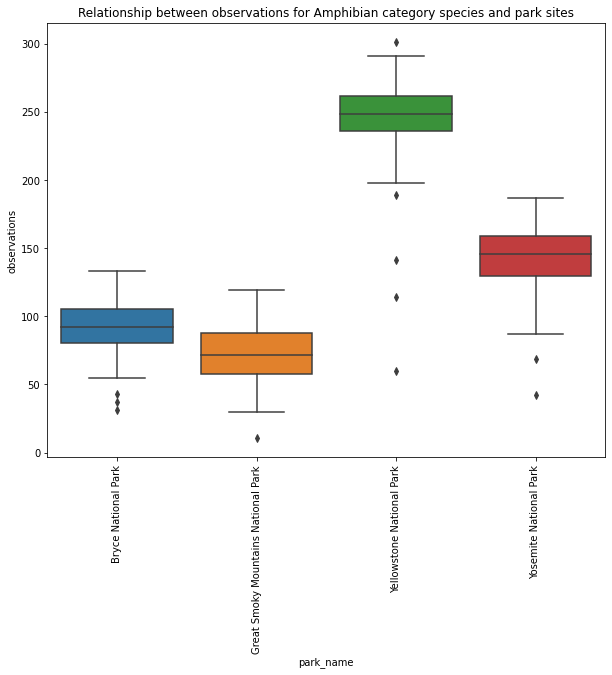

<Figure size 432x288 with 0 Axes>

In [39]:
#The facet grid of scatter graph mapping observations for Amphibian category species as a function of park sites
plt.figure(figsize=(10,8))
sns.boxplot(x="park_name", y="observations", data=Amp_ca.sort_values(by=['park_name']))
plt.title('Relationship between observations for Amphibian category species and park sites')
plt.xticks(rotation=90)
plt.savefig('Fig_obssparksites.png')
plt.show()
plt.clf()

In [40]:
#Bird
Bird_ca = merged_df2[merged_df2.category == 'Bird']
print(Bird_ca.head())
Bird_ca.observations.count()
Bird_ca.describe()

          scientific_name                            park_name  observations  \
24       Spizella pusilla            Yellowstone National Park           228   
25       Spizella pusilla               Yosemite National Park           148   
26       Spizella pusilla                  Bryce National Park            92   
27       Spizella pusilla  Great Smoky Mountains National Park            72   
44  Cistothorus platensis                  Bryce National Park           114   

   category   common_names conservation_status  is_protected  
24     Bird  Field Sparrow     No intervention         False  
25     Bird  Field Sparrow     No intervention         False  
26     Bird  Field Sparrow     No intervention         False  
27     Bird  Field Sparrow     No intervention         False  
44     Bird     Sedge Wren     No intervention         False  


,observations
count,2364.000000
mean,140.596870
std,69.349431
min,11.000000
25%,86.000000
50%,123.000000
75%,191.500000
max,305.000000


In [41]:
Bird_ca.sort_values(by=['park_name']).groupby("park_name").describe()

observations                               \
                                           count        mean        std   min   
park_name                                                                       
Bryce National Park                        591.0   99.137056  20.444381  20.0   
Great Smoky Mountains National Park        591.0   72.536379  21.371887  11.0   
Yellowstone National Park                  591.0  244.162437  27.263199  57.0   
Yosemite National Park                     591.0  146.551607  22.413834  37.0   

                                                                 
                                       25%    50%    75%    max  
park_name                                                        
Bryce National Park                   85.5   99.0  112.0  164.0  
Great Smoky Mountains National Park   58.0   73.0   86.0  139.0  
Yellowstone National Park            230.0  245.0  260.0  305.0  
Yosemite National Park               133.0  147.0  161.0  207.0

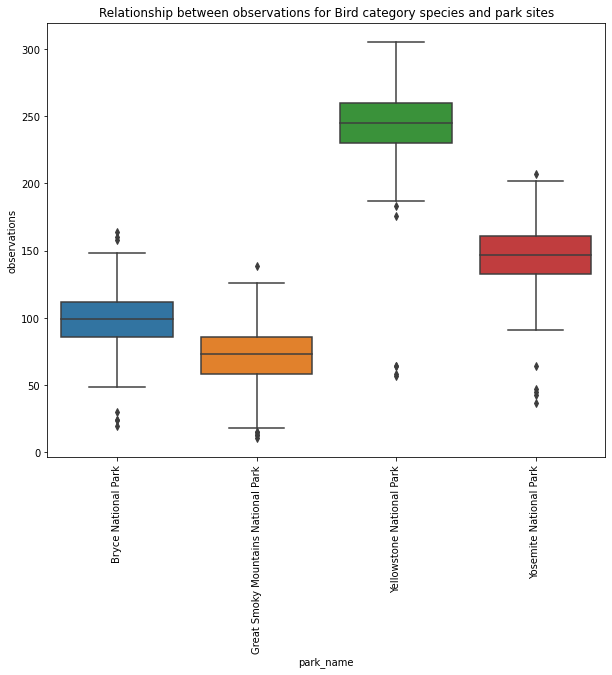

<Figure size 432x288 with 0 Axes>

In [42]:
#The facet grid of scatter graph mapping observations for Birds category species as a function of park sites
plt.figure(figsize=(10,8))
sns.boxplot(x="park_name", y="observations", data=Bird_ca.sort_values(by=['park_name']))
plt.title('Relationship between observations for Bird category species and park sites')
plt.xticks(rotation=90)
plt.savefig('Fig_birdsparksites.png')
plt.show()
plt.clf()

In [43]:
#Fish
Fish_ca = merged_df2[merged_df2.category == 'Fish']
print(Fish_ca.head())
Fish_ca.observations.count()
Fish_ca.describe()

           scientific_name                            park_name  observations  \
452  Hypentelium nigricans  Great Smoky Mountains National Park            54   
453  Hypentelium nigricans                  Bryce National Park           110   
454  Hypentelium nigricans            Yellowstone National Park           250   
455  Hypentelium nigricans               Yosemite National Park           158   
856    Oncorhynchus mykiss               Yosemite National Park           118   

    category         common_names conservation_status  is_protected  
452     Fish  Northern Hog Sucker     No intervention         False  
453     Fish  Northern Hog Sucker     No intervention         False  
454     Fish  Northern Hog Sucker     No intervention         False  
455     Fish  Northern Hog Sucker     No intervention         False  
856     Fish        Rainbow Trout     No intervention         False  


,observations
count,524.000000
mean,139.124046
std,71.152449
min,18.000000
25%,84.000000
50%,119.000000
75%,185.250000
max,300.000000


In [44]:
Fish_ca.sort_values(by=['park_name']).groupby("park_name").describe()

observations                               \
                                           count        mean        std   min   
park_name                                                                       
Bryce National Park                        131.0   97.885496  24.186977  22.0   
Great Smoky Mountains National Park        131.0   72.381679  21.900284  18.0   
Yellowstone National Park                  131.0  240.145038  41.825852  65.0   
Yosemite National Park                     131.0  146.083969  31.912630  31.0   

                                                                 
                                       25%    50%    75%    max  
park_name                                                        
Bryce National Park                   86.0   99.0  112.0  154.0  
Great Smoky Mountains National Park   60.0   72.0   90.0  133.0  
Yellowstone National Park            232.0  250.0  262.5  300.0  
Yosemite National Park               135.0  151.0  165.0  203.0

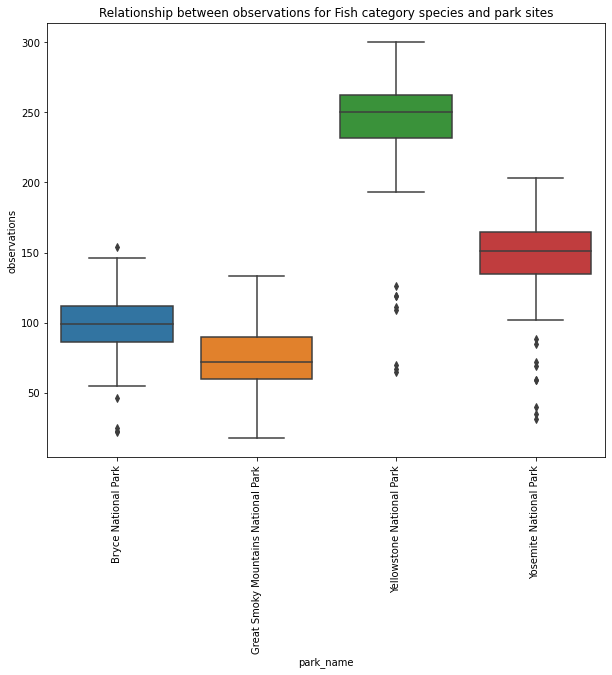

<Figure size 432x288 with 0 Axes>

In [45]:
#The facet grid of scatter graph mapping observations for Fish category species as a function of park sites
plt.figure(figsize=(10,8))
sns.boxplot(x="park_name", y="observations", data=Fish_ca.sort_values(by=['park_name']))
plt.title('Relationship between observations for Fish category species and park sites')
plt.xticks(rotation=90)
plt.savefig('Fig_obsFishsparksites.png')
plt.show()
plt.clf()

In [46]:
#Mammal
Mammal_ca = merged_df2[merged_df2.category == 'Mammal']
print(Mammal_ca.head())
Mammal_ca.observations.count()
Mammal_ca.describe()

        scientific_name                            park_name  observations  \
4        Neovison vison  Great Smoky Mountains National Park            77   
5        Neovison vison            Yellowstone National Park           218   
6        Neovison vison                  Bryce National Park            91   
7        Neovison vison               Yosemite National Park           200   
340  Blarina brevicauda                  Bryce National Park            77   

    category                                       common_names  \
4     Mammal                                      American Mink   
5     Mammal                                      American Mink   
6     Mammal                                      American Mink   
7     Mammal                                      American Mink   
340   Mammal  Northern Short Tailed Shrew, Northern Short-Ta...   

    conservation_status  is_protected  
4       No intervention         False  
5       No intervention         False  
6       

,observations
count,1200.000000
mean,135.933333
std,70.119597
min,13.000000
25%,81.000000
50%,121.000000
75%,185.250000
max,296.000000


In [47]:
Mammal_ca.sort_values(by=['park_name']).groupby("park_name").describe()

observations                               \
                                           count        mean        std   min   
park_name                                                                       
Bryce National Park                        300.0   96.100000  25.378671  22.0   
Great Smoky Mountains National Park        300.0   70.186667  22.848018  13.0   
Yellowstone National Park                  300.0  235.670000  41.567543  60.0   
Yosemite National Park                     300.0  141.776667  29.637500  34.0   

                                                                  
                                        25%    50%    75%    max  
park_name                                                         
Bryce National Park                   80.00   98.5  114.0  167.0  
Great Smoky Mountains National Park   57.00   71.0   85.0  127.0  
Yellowstone National Park            225.75  240.5  259.0  296.0  
Yosemite National Park               126.00  145.0  158.0  203.0

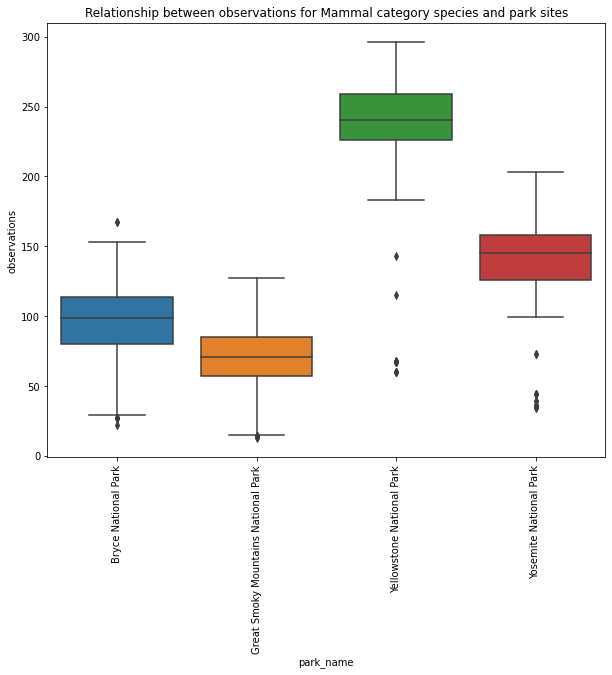

<Figure size 432x288 with 0 Axes>

In [48]:
#The facet grid of scatter graph mapping observations for Mammal category species as a function of park sites
plt.figure(figsize=(10,8))
sns.boxplot(x="park_name", y="observations", data=Mammal_ca.sort_values(by=['park_name']))
plt.title('Relationship between observations for Mammal category species and park sites')
plt.xticks(rotation=90)
plt.savefig('Fig_obsMammalparksites.png')
plt.show()
plt.clf()

In [49]:
#Non vascular plant
NonvascularPlant_ca = merged_df2[merged_df2.category == 'Nonvascular Plant']
print(NonvascularPlant_ca.head())
NonvascularPlant_ca.observations.count()
NonvascularPlant_ca.describe()

               scientific_name                            park_name  \
36  Diphyscium cumberlandianum            Yellowstone National Park   
37  Diphyscium cumberlandianum               Yosemite National Park   
38  Diphyscium cumberlandianum  Great Smoky Mountains National Park   
39  Diphyscium cumberlandianum                  Bryce National Park   
56           Fabronia ciliaris  Great Smoky Mountains National Park   

    observations           category                common_names  \
36           250  Nonvascular Plant  Cumberland Diphyscium Moss   
37           123  Nonvascular Plant  Cumberland Diphyscium Moss   
38            51  Nonvascular Plant  Cumberland Diphyscium Moss   
39            93  Nonvascular Plant  Cumberland Diphyscium Moss   
56            72  Nonvascular Plant               Fabronia Moss   

   conservation_status  is_protected  
36     No intervention         False  
37     No intervention         False  
38     No intervention         False  
39     No inte

,observations
count,1332.000000
mean,143.132883
std,69.835997
min,19.000000
25%,87.000000
50%,126.000000
75%,201.000000
max,307.000000


In [50]:
NonvascularPlant_ca.sort_values(by=['park_name']).groupby("park_name").describe()

observations                         \
                                           count        mean        std   
park_name                                                                 
Bryce National Park                        333.0   99.075075  20.391730   
Great Smoky Mountains National Park        333.0   74.645646  19.583632   
Yellowstone National Park                  333.0  249.312312  19.862443   
Yosemite National Park                     333.0  149.498498  18.927195   

                                                                        
                                       min    25%    50%    75%    max  
park_name                                                               
Bryce National Park                   39.0   87.0   99.0  112.0  156.0  
Great Smoky Mountains National Park   19.0   62.0   73.0   88.0  126.0  
Yellowstone National Park            199.0  235.0  248.0  264.0  307.0  
Yosemite National Park               100.0  137.0  149.0  163.0  210.0

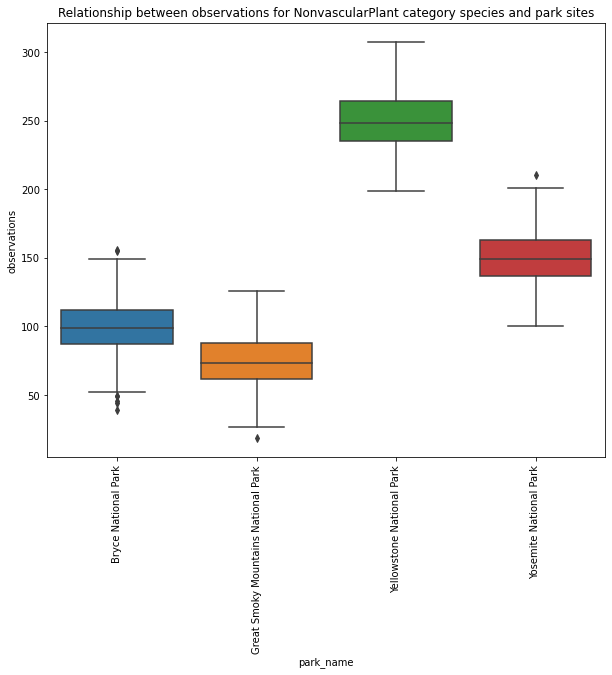

<Figure size 432x288 with 0 Axes>

In [51]:
#The facet grid of scatter graph mapping observations for NonvascularPlant category species as a function of park sites
plt.figure(figsize=(10,8))
sns.boxplot(x="park_name", y="observations", data=NonvascularPlant_ca.sort_values(by=['park_name']))
plt.title('Relationship between observations for NonvascularPlant category species and park sites')
plt.xticks(rotation=90)
plt.savefig('Fig_obsNVPparksites.png')
plt.show()
plt.clf()

In [52]:
#Reptile 
Reptile_ca = merged_df2[merged_df2.category == 'Reptile']
print(Reptile_ca.head())
Reptile_ca.observations.count()
Reptile_ca.describe()

                   scientific_name                            park_name  \
404   Thamnophis sirtalis sirtalis  Great Smoky Mountains National Park   
405   Thamnophis sirtalis sirtalis            Yellowstone National Park   
406   Thamnophis sirtalis sirtalis               Yosemite National Park   
407   Thamnophis sirtalis sirtalis                  Bryce National Park   
1136      Crotalus viridis viridis  Great Smoky Mountains National Park   

      observations category         common_names conservation_status  \
404             63  Reptile  Common Garter Snake     No intervention   
405            260  Reptile  Common Garter Snake     No intervention   
406            151  Reptile  Common Garter Snake     No intervention   
407            108  Reptile  Common Garter Snake     No intervention   
1136            55  Reptile  Prairie Rattlesnake     No intervention   

      is_protected  
404          False  
405          False  
406          False  
407          False  
1136       

,observations
count,324.000000
mean,141.425926
std,69.716570
min,18.000000
25%,85.000000
50%,121.500000
75%,194.250000
max,307.000000


In [53]:
Reptile_ca.sort_values(by=['park_name']).groupby("park_name").describe()

observations                         \
                                           count        mean        std   
park_name                                                                 
Bryce National Park                         81.0  100.506173  18.805666   
Great Smoky Mountains National Park         81.0   72.111111  20.779798   
Yellowstone National Park                   81.0  247.666667  20.015619   
Yosemite National Park                      81.0  145.419753  20.820581   

                                                                        
                                       min    25%    50%    75%    max  
park_name                                                               
Bryce National Park                   66.0   86.0  101.0  112.0  155.0  
Great Smoky Mountains National Park   18.0   59.0   73.0   83.0  117.0  
Yellowstone National Park            191.0  234.0  249.0  260.0  307.0  
Yosemite National Park                84.0  129.0  150.0  160.0  204.0

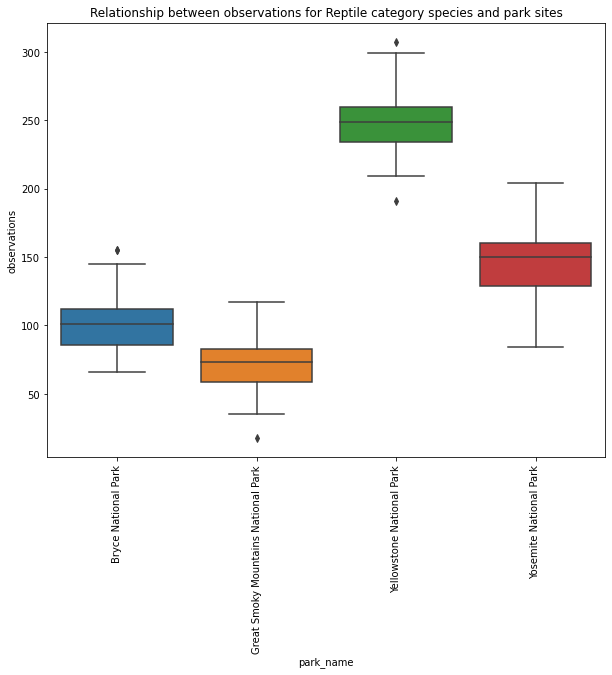

<Figure size 432x288 with 0 Axes>

In [54]:
#The facet grid of scatter graph mapping observations for Reptile category species as a function of park sites
plt.figure(figsize=(10,8))
sns.boxplot(x="park_name", y="observations", data=Reptile_ca.sort_values(by=['park_name']))
plt.title('Relationship between observations for Reptile category species and park sites')
plt.xticks(rotation=90)
plt.savefig('Fig_obsReptilesparksites.png')
plt.show()
plt.clf()

In [55]:
#Vascular plant
VascularPlant_ca = merged_df2[merged_df2.category == 'Vascular Plant']
print(VascularPlant_ca.head())
VascularPlant_ca.observations.count()
VascularPlant_ca.describe()

      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
8   Prunus subcordata               Yosemite National Park           138   

         category                        common_names conservation_status  \
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch     No intervention   
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch     No intervention   
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch     No intervention   
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch     No intervention   
8  Vascular Plant                        Klamath Plum     No intervention   

   is_protected  
0         False  
1         False  
2         False  
3       

,observations
count,19560.000000
mean,142.909611
std,69.900140
min,9.000000
25%,87.000000
50%,124.000000
75%,199.000000
max,321.000000


In [56]:
VascularPlant_ca.sort_values(by=['park_name']).groupby("park_name").describe()

observations                               \
                                           count        mean        std   min   
park_name                                                                       
Bryce National Park                       4890.0   99.053783  20.479908   9.0   
Great Smoky Mountains National Park       4890.0   74.617996  20.027923  10.0   
Yellowstone National Park                 4890.0  249.112883  20.238695  63.0   
Yosemite National Park                    4890.0  148.853783  20.291849  47.0   

                                                                 
                                       25%    50%    75%    max  
park_name                                                        
Bryce National Park                   85.0   99.0  113.0  176.0  
Great Smoky Mountains National Park   61.0   75.0   88.0  147.0  
Yellowstone National Park            236.0  249.0  263.0  321.0  
Yosemite National Park               135.0  149.0  163.0  223.0

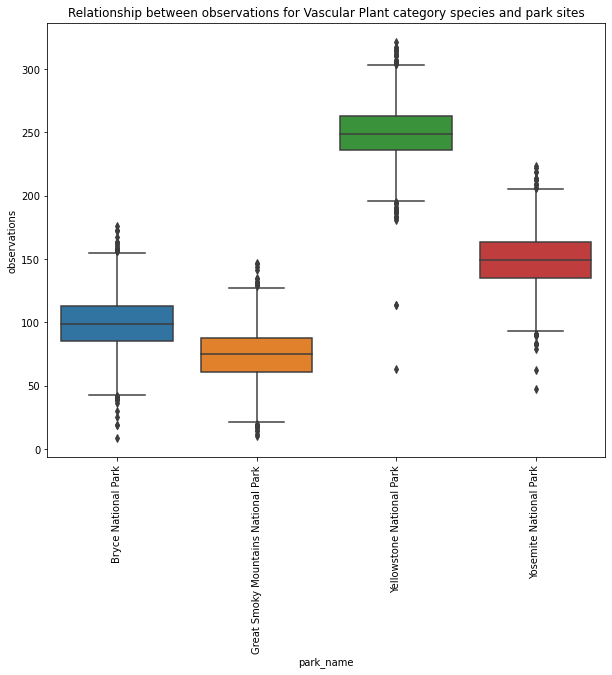

<Figure size 432x288 with 0 Axes>

In [57]:
#The facet grid of scatter graph mapping observations for VascularPlant category species as a function of park sites
plt.figure(figsize=(10,8))
sns.boxplot(x="park_name", y="observations", data=VascularPlant_ca.sort_values(by=['park_name']))
plt.title('Relationship between observations for Vascular Plant category species and park sites')
plt.xticks(rotation=90)
plt.savefig('Fig_obsVPparksites.png')
plt.show()
plt.clf()

# References

https://www.nps.gov/articles/npspecies.htm

https://www.kaggle.com/datasets/nationalparkservice/park-biodiversity